# Panel data in pandas

Files needed = ('dogs.csv', 'WEOOct2019all.csv')

We are learning how to deal with complex datasets in pandas. We began by tackling the multiIndex and now we turn to panel data and its various representations.  

Panel data have (at least) three dimensions, for example, a panel might record

1. several variables (income, age, spending on cheese)
2. regarding several people
3. over time

The multiIndex gives us a natural way to handle this data. In this notebook, we work on ways to get our datasets into shapes that are amenable to analysis. 

In [1]:
import pandas as pd                 # load pandas and shorten it to pd
import datetime as dt               # load datetime and shorten it to dt
import matplotlib.pyplot as plt     # for making figures

## Some panel data
Load the 'dogs.csv' file. The different dimensions of the data are: **variables** (walks, snacks); **dogs** (Buster, Su); and  **time**. The column **value** are the data associated with the dog-variable-time triplet. 
 
The difference between the 'prem' dataset in the last notebook and this one is that the dogs dataset has a *time dimension.*

\[For reference, here are [Buster and Su](http://badgerdata.org/images/best_dogs.jpg) and [Jax](http://badgerdata.org/images/jax.jpg) the wild dog.\] 

In [2]:
# load a data file with the number of walks and snacks my dogs have had 

dogs = pd.read_csv('dogs.csv') 
dogs

,dog,var,time,value
0,Buster,walks,10/1/2018,2
1,Buster,walks,10/2/2018,2
2,Buster,snacks,10/1/2018,4
3,Buster,snacks,10/2/2018,3
4,Buster,snacks,10/3/2018,4
5,Buster,snacks,10/4/2018,5
6,Su,walks,10/1/2018,2
7,Su,walks,10/2/2018,2
8,Su,walks,10/3/2018,2
9,Su,snacks,10/1/2018,3


In [3]:
dogs.dtypes

dog      object
var      object
time     object
value     int64
dtype: object

### Long vs. wide (or stacked vs. unstacked)

The data in the file we just loaded is formatted as **long**: There are lots of rows and not many columns. Moving between long and **wide** (lots of columns, fewer rows) is a common task in setting up panel data sets. 

Pandas calls long data **stacked** and wide data **unstacked**. We use the `.stack()` and `.unstack()` methods for moving between long and wide with multiIndexed data. Stack and unstack do not work in place. They always return a copy, so we need to assign it to a variable.

The typical workflow is:

1. Set up the index
2. Stack or unstack

### Set up the index
`.stack()` and `.unstack()` work from the index. Since our data may be many-dimensional, multiIndexes are often useful. We start by getting the index set so that we can reshape our data. 

In [4]:
dogs['time'] = pd.to_datetime(dogs['time'])

# move everything but the data values to the index
dogs = dogs.set_index(['dog', 'time', 'var'])
dogs = dogs.sort_index()
dogs

value
dog    time       var          
Buster 2018-10-01 snacks      4
                  walks       2
       2018-10-02 snacks      3
                  walks       2
       2018-10-03 snacks      4
       2018-10-04 snacks      5
                  walks       2
       2018-10-05 snacks      4
                  walks       3
       2018-10-06 snacks      3
                  walks       1
       2018-10-07 snacks      2
                  walks       3
Jax    2018-10-04 snacks      5
                  walks       3
       2018-10-05 snacks      5
                  walks       2
       2018-10-06 snacks      5
                  walks       2
       2018-10-07 snacks      7
                  walks       3
Su     2018-10-01 snacks      3
                  walks       2
       2018-10-02 snacks      4
                  walks       2
       2018-10-03 snacks      4
                  walks       2
       2018-10-04 snacks      3
                  walks       3
       2018-10-05 snacks      3
                  walks       2
       2018-10-06 snacks      4
                  walks       4
       2018-10-07 snacks      2
                  walks       1

## Unstack
We **unstack the data** to put the variables into columns. This creates a multiIndex over the columns.

In [5]:
# We pass unstack the name of the index level to take out of the index and spread across the rows. 
dogs_us = dogs.unstack('var') 
dogs_us

value      
var               snacks walks
dog    time                   
Buster 2018-10-01    4.0   2.0
       2018-10-02    3.0   2.0
       2018-10-03    4.0   NaN
       2018-10-04    5.0   2.0
       2018-10-05    4.0   3.0
       2018-10-06    3.0   1.0
       2018-10-07    2.0   3.0
Jax    2018-10-04    5.0   3.0
       2018-10-05    5.0   2.0
       2018-10-06    5.0   2.0
       2018-10-07    7.0   3.0
Su     2018-10-01    3.0   2.0
       2018-10-02    4.0   2.0
       2018-10-03    4.0   2.0
       2018-10-04    3.0   3.0
       2018-10-05    3.0   2.0
       2018-10-06    4.0   4.0
       2018-10-07    2.0   1.0

The data are now **wide** (or, at least, wider). We have shortened the number of rows and increased the number of columns. This is my preferred way to shape this data because it puts the unit of observation in the row index. In this case, the unit of observation is a dog-day. 

Notice that Buster has an entry for snacks for 10/3, but not for walks. When pandas unstacked the data, it inserted `NaN`s for the missing observation.

The column index is now a multiIndex:

In [6]:
dogs_us.columns

MultiIndex([('value', 'snacks'),
            ('value',  'walks')],
           names=[None, 'var'])

We can unstack several variables. As usual, we pass a list of variable names. 
```python
dogs.unstack(['dog', 'var'])
```

In [9]:
dogs_threes = dogs.unstack(['dog', 'var'])

dogs_threes

value                                
dog        Buster          Jax           Su      
var        snacks walks snacks walks snacks walks
time                                             
2018-10-01    4.0   2.0    NaN   NaN    3.0   2.0
2018-10-02    3.0   2.0    NaN   NaN    4.0   2.0
2018-10-03    4.0   NaN    NaN   NaN    4.0   2.0
2018-10-04    5.0   2.0    5.0   3.0    3.0   3.0
2018-10-05    4.0   3.0    5.0   2.0    3.0   2.0
2018-10-06    3.0   1.0    5.0   2.0    4.0   4.0
2018-10-07    2.0   3.0    7.0   3.0    2.0   1.0

### Removing a level
The outermost level of the column multiIndex is 'value' and is not very useful. Let's drop it.

Note that the level does not have a name associated with it (`None` is not a name) so we need to use the number associated with the level. 

In [10]:
dogs_us.columns = dogs_us.columns.droplevel(level = 0)
dogs_us

var                snacks  walks
dog    time                     
Buster 2018-10-01     4.0    2.0
       2018-10-02     3.0    2.0
       2018-10-03     4.0    NaN
       2018-10-04     5.0    2.0
       2018-10-05     4.0    3.0
       2018-10-06     3.0    1.0
       2018-10-07     2.0    3.0
Jax    2018-10-04     5.0    3.0
       2018-10-05     5.0    2.0
       2018-10-06     5.0    2.0
       2018-10-07     7.0    3.0
Su     2018-10-01     3.0    2.0
       2018-10-02     4.0    2.0
       2018-10-03     4.0    2.0
       2018-10-04     3.0    3.0
       2018-10-05     3.0    2.0
       2018-10-06     4.0    4.0
       2018-10-07     2.0    1.0

In [11]:
dogs_us.columns

Index(['snacks', 'walks'], dtype='object', name='var')

### Creating new variables
I want to know the walk-to-snacks ratio to make sure they are getting enough exercise. We want to compute the walk-snack ratio for each dog. This works exactly like you think it does. 

In [12]:
dogs_us['ws_ratio'] = dogs_us['walks']/dogs_us['snacks']
dogs_us

var                snacks  walks  ws_ratio
dog    time                               
Buster 2018-10-01     4.0    2.0  0.500000
       2018-10-02     3.0    2.0  0.666667
       2018-10-03     4.0    NaN       NaN
       2018-10-04     5.0    2.0  0.400000
       2018-10-05     4.0    3.0  0.750000
       2018-10-06     3.0    1.0  0.333333
       2018-10-07     2.0    3.0  1.500000
Jax    2018-10-04     5.0    3.0  0.600000
       2018-10-05     5.0    2.0  0.400000
       2018-10-06     5.0    2.0  0.400000
       2018-10-07     7.0    3.0  0.428571
Su     2018-10-01     3.0    2.0  0.666667
       2018-10-02     4.0    2.0  0.500000
       2018-10-03     4.0    2.0  0.500000
       2018-10-04     3.0    3.0  1.000000
       2018-10-05     3.0    2.0  0.666667
       2018-10-06     4.0    4.0  1.000000
       2018-10-07     2.0    1.0  0.500000

As usual, pandas handles our missing observations gracefully. 

### Plotting with panels
Let's plot the walk-snack ratio. The plotting is straightforward, but we need to use our multiIndex skills to select the data. 

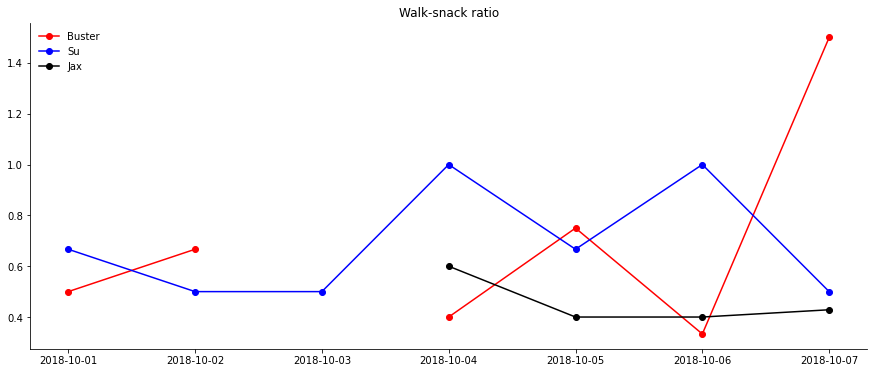

In [13]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(dogs_us.loc['Buster'].index, dogs_us.loc['Buster', 'ws_ratio'], color='red', marker = 'o', label='Buster')
ax.plot(dogs_us.loc['Su'].index, dogs_us.loc['Su', 'ws_ratio'], color='blue', marker = 'o', label='Su')
ax.plot(dogs_us.loc['Jax'].index, dogs_us.loc['Jax', 'ws_ratio'], color='black', marker = 'o', label='Jax')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Walk-snack ratio')
ax.legend(frameon=False)

plt.show()

Looking at my code for this figure I see that I basically repeated the same code three times. Not good! I should automate the plotting or use a package like seaborn to automate it for me.  

## Stack
We can **stack the data** to put the variables back on the rows. 

When we stack the data, pandas defaults to dropping the NaNs, which saves space. We can override this if we choose with the `dropna=False` option. 


In [14]:
# stack() shifts the columns to rows. 
dogs_s = dogs_us.stack(dropna=True)       
dogs_s

dog     time        var     
Buster  2018-10-01  snacks      4.000000
                    walks       2.000000
                    ws_ratio    0.500000
        2018-10-02  snacks      3.000000
                    walks       2.000000
                    ws_ratio    0.666667
        2018-10-03  snacks      4.000000
        2018-10-04  snacks      5.000000
                    walks       2.000000
                    ws_ratio    0.400000
        2018-10-05  snacks      4.000000
                    walks       3.000000
                    ws_ratio    0.750000
        2018-10-06  snacks      3.000000
                    walks       1.000000
                    ws_ratio    0.333333
        2018-10-07  snacks      2.000000
                    walks       3.000000
                    ws_ratio    1.500000
Jax     2018-10-04  snacks      5.000000
                    walks       3.000000
                    ws_ratio    0.600000
        2018-10-05  snacks      5.000000
                    walks   

This is a Series object&mdash;it only has one column of data and the rest is the index.

Let's get this ready to save as long data, like it was when we read it in.

1. Reset the index to move them back to columns. Now we have a DataFrame rather than a Series.
2. Give the 'value' column a name. 

In [15]:
dogs_s = dogs_s.reset_index()
dogs_s.head()

,dog,time,var,0
0,Buster,2018-10-01,snacks,4.0
1,Buster,2018-10-01,walks,2.0
2,Buster,2018-10-01,ws_ratio,0.5
3,Buster,2018-10-02,snacks,3.0
4,Buster,2018-10-02,walks,2.0


In [16]:
dogs_s.rename(columns={0 :'value'}, inplace=True)
dogs_s.head()

,dog,time,var,value
0,Buster,2018-10-01,snacks,4.0
1,Buster,2018-10-01,walks,2.0
2,Buster,2018-10-01,ws_ratio,0.5
3,Buster,2018-10-02,snacks,3.0
4,Buster,2018-10-02,walks,2.0


In [ ]:
# Now save it. 
dogs_s.to_csv('dog_data_updated.csv', index=False)  #index = False does not print the index

## Practice

Let's review multiIndexing with some real world data. The data are messy and will require some cleaning up and 'wrangling.' We will do some of it together, then I'll  hand it off for you all to finish. 

Our **goal** is to study the evolution of debt in Germany, Argentina, and Greece. 

We will work with the IMF's [World Economic Outlook](https://www.imf.org/external/pubs/ft/weo/2019/02/weodata/download.aspx), which contains historical data and the IMF's forecasts for many countries and variables. The file is the 'By Countries' file. Do not, however download it. Use the one that I have provided. Here's why:

The file is a disgrace. 

* Even on the webpage, it says the file is **tab delimited**, yet, the file extension is 'xls'. If you tried to load it with `.read_excel()` it would not work. 
* The file is [encoded](https://en.wikipedia.org/wiki/Character_encoding) in a strange way.

To make our lives simpler, I turned the file into a csv file that is reasonably encoded. If you want to know how to handle all of this directly in pandas drop me a line.   

### Read the data into a DataFrame

Open the file up and take a peak. I see 'n/a' and '--' as missing data markers. 

Read in the data, then inspect the head and tail to make sure it looks as expected.

In [17]:
weo = pd.read_csv('WEOOct2019all.csv', na_values=['n/a', '--'])
weo.head(2)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,493.073,506.215,519.883,535.479,554.101,576.265,602.197,632.307,667.084,2018.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,2.164,2.665,2.7,3,3.478,4,4.5,5,5.5,2018.0


In [18]:
weo.dtypes

WEO Country Code                  object
ISO                               object
WEO Subject Code                  object
Country                           object
Subject Descriptor                object
Subject Notes                     object
Units                             object
Scale                             object
Country/Series-specific Notes     object
1980                              object
1981                              object
1982                              object
1983                              object
1984                              object
1985                              object
1986                              object
1987                              object
1988                              object
1989                              object
1990                              object
1991                              object
1992                              object
1993                              object
1994                              object
1995            

Hmm, those yearly variables should be numbers, not objects. Let's check the tail...

In [19]:
weo.tail()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Estimates Start After
8727,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,20.806,27.438,42.795,97.461,122.244,127.944,136.028,143.575,152.039,2017.0
8728,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,-0.718,-0.284,-1.035,-0.069,-0.32,-0.346,-0.36,-0.446,-0.456,2017.0
8729,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,-3.58,-1.299,-4.929,-0.541,-2.485,-2.57,-2.514,-2.948,-2.849,2015.0
8730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8731,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Those last two lines are junk. The second-to-last line is blank and the last line is just some text. Let's reload the file and use the `skipfooter` option. We tell `skipfooter` the number of rows at the bottom to skip.   

In [20]:
weo = pd.read_csv('WEOOct2019all.csv', na_values=['n/a', '--'], skipfooter=2)
weo.tail(2)

<ipython-input-20-c849bbe3de20>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  weo = pd.read_csv('WEOOct2019all.csv', na_values=['n/a', '--'], skipfooter=2)


,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Estimates Start After
8728,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,-0.718,-0.284,-1.035,-0.069,-0.32,-0.346,-0.36,-0.446,-0.456,2017.0
8729,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,-3.58,-1.299,-4.929,-0.541,-2.485,-2.57,-2.514,-2.948,-2.849,2015.0


\[You probably received a warning. It is nothing for us to worry about. If you are curious, you can read about in the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.errors.ParserWarning.html). \]

That looks better. Are we all set?

In [21]:
weo.dtypes

WEO Country Code                   int64
ISO                               object
WEO Subject Code                  object
Country                           object
Subject Descriptor                object
Subject Notes                     object
Units                             object
Scale                             object
Country/Series-specific Notes     object
1980                              object
1981                              object
1982                              object
1983                              object
1984                              object
1985                              object
1986                              object
1987                              object
1988                              object
1989                              object
1990                              object
1991                              object
1992                              object
1993                              object
1994                              object
1995            

Dang, we still aren't there yet! Let's look at the file again: Oh, I see. They left the commas in the numbers. Pandas doesn't know what to do with the comma (in some countries, a comma is used where Americans use a decimal point) so it just makes them strings. We use the `thousands` option to tell pandas that the thousands separator is a comma.  

In [23]:
weo = pd.read_csv('WEOOct2019all.csv', na_values=['n/a', '--'], skipfooter=2, thousands=',')
weo.dtypes

<ipython-input-23-d1a931a3cabc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  weo = pd.read_csv('WEOOct2019all.csv', na_values=['n/a', '--'], skipfooter=2, thousands=',')


WEO Country Code                   int64
ISO                               object
WEO Subject Code                  object
Country                           object
Subject Descriptor                object
Subject Notes                     object
Units                             object
Scale                             object
Country/Series-specific Notes     object
1980                             float64
1981                             float64
1982                             float64
1983                             float64
1984                             float64
1985                             float64
1986                             float64
1987                             float64
1988                             float64
1989                             float64
1990                             float64
1991                             float64
1992                             float64
1993                             float64
1994                             float64
1995            

Yeah, that's the good stuff. In the end, the code to read in the data is pretty simple 
```python
pd.read_csv('WEOOct2019all.csv', na_values=['n/a', '--'], skipfooter=2, thousands=',')
```

but it took several tries and a few looks at the raw data. It is not uncommon to have to work a bit just to get the data onto your computer. 

### Drop unneeded variables
Use `drop()` to get rid of columns that we are not going to use.

In [24]:
weo.drop(['WEO Country Code', 'Subject Notes', 'Country', 'Country/Series-specific Notes', 'Scale', 'Estimates Start After'],axis=1, inplace=True)
weo.head()

,ISO,WEO Subject Code,Subject Descriptor,Units,1980,1981,1982,1983,1984,1985,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,AFG,NGDP_R,"Gross domestic product, constant prices",National currency,NaN,NaN,NaN,NaN,NaN,NaN,...,482.629,493.073,506.215,519.883,535.479,554.101,576.265,602.197,632.307,667.084
1,AFG,NGDP_RPCH,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,NaN,NaN,...,0.988,2.164,2.665,2.700,3.000,3.478,4.000,4.500,5.000,5.500
2,AFG,NGDP,"Gross domestic product, current prices",National currency,NaN,NaN,NaN,NaN,NaN,NaN,...,1226.570,1318.480,1377.540,1421.410,1502.470,1624.890,1770.340,1942.730,2142.060,2373.040
3,AFG,NGDPD,"Gross domestic product, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,NaN,...,20.057,19.428,20.235,19.630,18.734,18.861,19.998,21.540,23.237,25.190
4,AFG,PPPGDP,"Gross domestic product, current prices",Purchasing power parity; international dollars,NaN,NaN,NaN,NaN,NaN,NaN,...,64.231,66.301,69.350,72.958,76.486,80.717,85.678,91.329,97.814,105.271


In [25]:
weo.shape

(8730, 49)

### Keep the countries and variables we want
Let's look at Argentina, Germany, and Greece and the variables debt-gdp ratio and deficit-gdp ratio. We will use this as an opportunity to learn about the `.isin( )` method of DataFrame. We looked at a similar method `in()` in 15-minute Friday #2. 

In [26]:
variables = ['GGXWDG_NGDP', 'GGXCNL_NGDP']
countries = ['ARG', 'DEU', 'GRC']

weo = weo[ (weo['WEO Subject Code'].isin(variables)) & (weo['ISO'].isin(countries)) ]
weo

,ISO,WEO Subject Code,Subject Descriptor,Units,1980,1981,1982,1983,1984,1985,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
258,ARG,GGXCNL_NGDP,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.001,-6.655,-6.703,-5.225,-3.965,-2.680,-3.126,-2.993,-2.724,-2.925
266,ARG,GGXWDG_NGDP,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,...,52.563,53.060,57.111,86.058,93.301,80.816,76.358,73.961,70.473,68.031
2868,DEU,GGXCNL_NGDP,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,...,0.943,1.184,1.242,1.867,1.109,0.992,0.741,0.778,0.951,1.008
2876,DEU,GGXWDG_NGDP,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,...,72.011,69.107,65.190,61.691,58.577,55.704,53.114,50.706,48.129,45.569
2958,GRC,GGXCNL_NGDP,General government net lending/borrowing,Percent of GDP,-2.466,-6.977,-5.417,-6.088,-7.092,-9.428,...,-2.771,0.555,1.057,0.958,-0.310,-1.001,-1.075,-1.159,-1.393,-1.630
2966,GRC,GGXWDG_NGDP,General government gross debt,Percent of GDP,22.526,26.681,29.310,33.591,40.061,46.621,...,177.825,181.074,179.275,184.851,176.638,171.392,167.070,161.692,157.168,154.133


### The .isin() method
Check out the way that I selected the rows of the DataFrame I wanted. I used the `.isin()` method ([docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html)). You pass it a list of values and it returns a DataFrame of bools which you use to subset the data. I'm using it twice: once to specify the variables I want and once to specify the countries I want. I join the two together with an & operator.  


This is a lot cleaner than using a bunch of conditional statements like.  

```python
weo = weo[((weo['WEO Subject Code']=='GGXWDG_NGDP')|(weo['WEO Subject Code']=='GGXCNL_NGDP')) & 
          ((weo['ISO']=='ARG)|(weo['ISO']=='DEU)|(weo['ISO']=='GRC))]
```



### Your turn
Now the data are in pretty decent shape. Take a few minutes and try the following. Feel free to chat with those around if you get stuck. I am here, too.

1. Rename the 'WEO Subject Code' to 'Variable' and 'Subject Descriptor' to 'Description'.

In [30]:
#1
weo = weo.rename(columns = {'WEO Subject Code':'Variable'})
weo = weo.rename(columns = {'Subject Descriptor':'Description'})


2. Replace 'GGXCNL_NGDP' with 'Surplus
3. Replace 'GGXWDG_NGDP' with 'Debt'

In [31]:
#2+3
weo['Variable'] = weo['Variable'].replace({'GGXCNL_NGDP':'Surplus', 'GGXWDG_NGDP':'Debt'})
weo

,ISO,Variable,Description,Units,1980,1981,1982,1983,1984,1985,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
258,ARG,Surplus,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.001,-6.655,-6.703,-5.225,-3.965,-2.680,-3.126,-2.993,-2.724,-2.925
266,ARG,Debt,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,...,52.563,53.060,57.111,86.058,93.301,80.816,76.358,73.961,70.473,68.031
2868,DEU,Surplus,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,...,0.943,1.184,1.242,1.867,1.109,0.992,0.741,0.778,0.951,1.008
2876,DEU,Debt,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,...,72.011,69.107,65.190,61.691,58.577,55.704,53.114,50.706,48.129,45.569
2958,GRC,Surplus,General government net lending/borrowing,Percent of GDP,-2.466,-6.977,-5.417,-6.088,-7.092,-9.428,...,-2.771,0.555,1.057,0.958,-0.310,-1.001,-1.075,-1.159,-1.393,-1.630
2966,GRC,Debt,General government gross debt,Percent of GDP,22.526,26.681,29.310,33.591,40.061,46.621,...,177.825,181.074,179.275,184.851,176.638,171.392,167.070,161.692,157.168,154.133


4. Set the index to be 'Variable', 'ISO', 'Description', and 'Units'. Now the index will have everything in it that is not data. 
5. Stack the data. 

In [32]:
#4
weo.set_index(['Variable', 'ISO', 'Description','Units'], inplace=True)
weo

,,,,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Variable,ISO,Description,Units,,,,,,,,,,,,,,,,,,,,,
Surplus,ARG,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.001,-6.655,-6.703,-5.225,-3.965,-2.680,-3.126,-2.993,-2.724,-2.925
Debt,ARG,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.563,53.060,57.111,86.058,93.301,80.816,76.358,73.961,70.473,68.031
Surplus,DEU,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.943,1.184,1.242,1.867,1.109,0.992,0.741,0.778,0.951,1.008
Debt,DEU,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.011,69.107,65.190,61.691,58.577,55.704,53.114,50.706,48.129,45.569
Surplus,GRC,General government net lending/borrowing,Percent of GDP,-2.466,-6.977,-5.417,-6.088,-7.092,-9.428,-8.500,-7.978,-9.492,-11.733,...,-2.771,0.555,1.057,0.958,-0.310,-1.001,-1.075,-1.159,-1.393,-1.630
Debt,GRC,General government gross debt,Percent of GDP,22.526,26.681,29.310,33.591,40.061,46.621,47.142,52.413,57.069,59.821,...,177.825,181.074,179.275,184.851,176.638,171.392,167.070,161.692,157.168,154.133


In [33]:
#5
weo_s = weo.stack()
weo_s

Variable  ISO  Description                               Units               
Surplus   ARG  General government net lending/borrowing  Percent of GDP  1993     -0.025
                                                                         1994     -1.289
                                                                         1995     -2.137
                                                                         1996     -2.898
                                                                         1997     -1.895
                                                                                  ...   
Debt      GRC  General government gross debt             Percent of GDP  2020    171.392
                                                                         2021    167.070
                                                                         2022    161.692
                                                                         2023    157.168
                                

Great. Now are data are stacked, or long. Let's get the DataFrame into the shape we want: Observations in the row index and variables in the column index. 

6. Unstack 'Variable', 'Description', and 'Units', in that order. We want the variable names on the outermost level.

In [34]:
#6
weo2 = weo_s.unstack(['Variable','Description','Units'])
weo2


Variable                                     Surplus  \
Description General government net lending/borrowing   
Units                                 Percent of GDP   
ISO                                                    
ARG 1992                                         NaN   
    1993                                      -0.025   
    1994                                      -1.289   
    1995                                      -2.137   
    1996                                      -2.898   
...                                              ...   
GRC 2020                                      -1.001   
    2021                                      -1.075   
    2022                                      -1.159   
    2023                                      -1.393   
    2024                                      -1.630   

Variable                             Debt  
Description General government gross debt  
Units                      Percent of GDP  
ISO                                        
ARG 1992                           25.746  
    1993                           27.739  
    1994                           29.310  
    1995                           31.673  
    1996                           33.561  
...                                   ...  
GRC 2020                          171.392  
    2021                          167.070  
    2022                          161.692  
    2023                          157.168  
    2024                          154.133  

[112 rows x 2 columns]

We are almost ready to go. One problem remains...

7. Check the index. What kind of variable are the dates?
8. Reset the index and convert the dates to `datetime`.
9. Set the index back to the country name and year.

In [35]:
#7
print(weo2.dtypes)
weo2.index

Variable  Description                               Units         
Surplus   General government net lending/borrowing  Percent of GDP    float64
Debt      General government gross debt             Percent of GDP    float64
dtype: object


MultiIndex([('ARG', '1992'),
            ('ARG', '1993'),
            ('ARG', '1994'),
            ('ARG', '1995'),
            ('ARG', '1996'),
            ('ARG', '1997'),
            ('ARG', '1998'),
            ('ARG', '1999'),
            ('ARG', '2000'),
            ('ARG', '2001'),
            ...
            ('GRC', '2015'),
            ('GRC', '2016'),
            ('GRC', '2017'),
            ('GRC', '2018'),
            ('GRC', '2019'),
            ('GRC', '2020'),
            ('GRC', '2021'),
            ('GRC', '2022'),
            ('GRC', '2023'),
            ('GRC', '2024')],
           names=['ISO', None], length=112)

In [36]:
#8
weo2 = weo2.reset_index()
weo2

Variable,ISO,level_1,Surplus,Debt
Description,,,General government net lending/borrowing,General government gross debt
Units,,,Percent of GDP,Percent of GDP
0,ARG,1992,NaN,25.746
1,ARG,1993,-0.025,27.739
2,ARG,1994,-1.289,29.310
3,ARG,1995,-2.137,31.673
4,ARG,1996,-2.898,33.561
...,...,...,...,...
107,GRC,2020,-1.001,171.392
108,GRC,2021,-1.075,167.070


In [37]:
#8+9
weo2['level_1'] = pd.to_datetime(weo2['level_1'])
weo2 = weo2.set_index(['ISO', 'level_1'])
weo2.head(3)

Variable                                        Surplus  \
Description    General government net lending/borrowing   
Units                                    Percent of GDP   
ISO level_1                                               
ARG 1992-01-01                                      NaN   
    1993-01-01                                   -0.025   
    1994-01-01                                   -1.289   

Variable                                Debt  
Description    General government gross debt  
Units                         Percent of GDP  
ISO level_1                                   
ARG 1992-01-01                        25.746  
    1993-01-01                        27.739  
    1994-01-01                        29.310

7. Plot debt levels for Argentina, Germany and Greece for all the years in the data. Add a legend. Make the figure look nice.

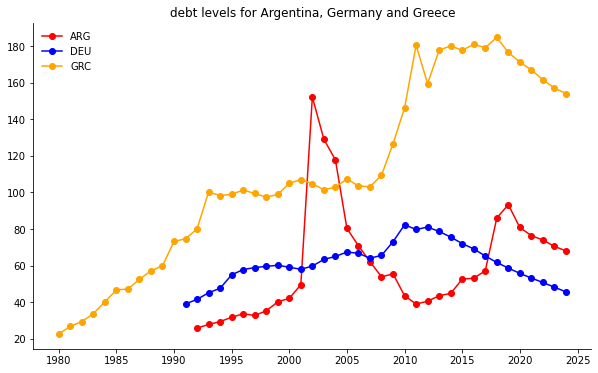

In [41]:
#7

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(weo2.loc['ARG'].index, weo2.loc['ARG', 'Debt'], color='red', marker = 'o', label='ARG')
ax.plot(weo2.loc['DEU'].index, weo2.loc['DEU', 'Debt'], color='BLUE', marker = 'o', label='DEU')
ax.plot(weo2.loc['GRC'].index, weo2.loc['GRC', 'Debt'], color='ORANGE', marker = 'o', label='GRC')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False)

ax.set_title('debt levels for Argentina, Germany and Greece')


plt.show()

Wow, Greece has had an interesting run. Let's look at Greece more closely. 
8. Create a (2,1) grid of subplots. Plot Greece's surplus in the top axes and debt in the bottom axis. Make it look nice.

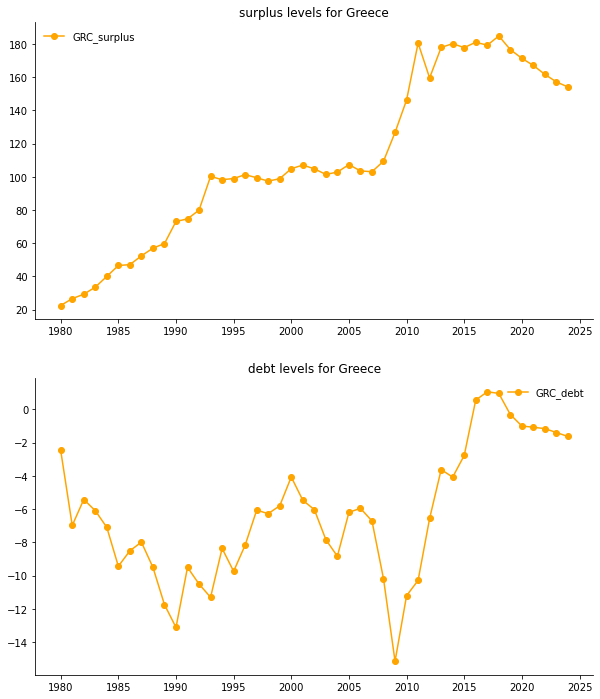

In [45]:
#8

fig, ax = plt.subplots(2,1, figsize=(10,12))

ax[0].plot(weo2.loc['GRC'].index, weo2.loc['GRC', 'Debt'], color='ORANGE', marker = 'o', label='GRC_surplus')
ax[1].plot(weo2.loc['GRC'].index, weo2.loc['GRC', 'Surplus'], color='ORANGE', marker = 'o', label='GRC_debt')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend(frameon=False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend(frameon=False)

ax[0].set_title('surplus levels for Greece')
ax[1].set_title('debt levels for Greece')

plt.show()

9. Stack the data to create a long dataset
10. Save the stacked data as a csv file

In [49]:
weo_long = weo2.stack(level=[ 'Variable', 'Description', 'Units'])

weo_long

ISO  level_1     Variable  Description                               Units         
ARG  1992-01-01  Debt      General government gross debt             Percent of GDP     25.746
     1993-01-01  Debt      General government gross debt             Percent of GDP     27.739
                 Surplus   General government net lending/borrowing  Percent of GDP     -0.025
     1994-01-01  Debt      General government gross debt             Percent of GDP     29.310
                 Surplus   General government net lending/borrowing  Percent of GDP     -1.289
                                                                                        ...   
GRC  2022-01-01  Surplus   General government net lending/borrowing  Percent of GDP     -1.159
     2023-01-01  Debt      General government gross debt             Percent of GDP    157.168
                 Surplus   General government net lending/borrowing  Percent of GDP     -1.393
     2024-01-01  Debt      General government gross debt     

*Challenging*: Notice that the year column is labeled 'level_1'. Where in our operations above did that happen? Can you change 'level_1' to 'Year'? 

In [51]:
weo_long.index = weo_long.index.rename('year', level=1)

weo_long

ISO  year        Variable  Description                               Units         
ARG  1992-01-01  Debt      General government gross debt             Percent of GDP     25.746
     1993-01-01  Debt      General government gross debt             Percent of GDP     27.739
                 Surplus   General government net lending/borrowing  Percent of GDP     -0.025
     1994-01-01  Debt      General government gross debt             Percent of GDP     29.310
                 Surplus   General government net lending/borrowing  Percent of GDP     -1.289
                                                                                        ...   
GRC  2022-01-01  Surplus   General government net lending/borrowing  Percent of GDP     -1.159
     2023-01-01  Debt      General government gross debt             Percent of GDP    157.168
                 Surplus   General government net lending/borrowing  Percent of GDP     -1.393
     2024-01-01  Debt      General government gross debt     